In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

data = pd.read_csv('/content/gapminder.csv', low_memory=False)
 
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
data['polityscore'] = pd.to_numeric(data['polityscore'], errors='coerce')
data['alcconsumption'] = pd.to_numeric(data['alcconsumption'], errors='coerce')
data['lifeexpectancy'] = pd.to_numeric(data['lifeexpectancy'], errors='coerce')
data['urbanrate'] = pd.to_numeric(data['urbanrate'], errors='coerce')
 
sub1 = data.copy()

data_clean = sub1.dropna()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
cluster = data_clean[['incomeperperson','employrate','femaleemployrate','polityscore',
                      'alcconsumption', 'lifeexpectancy', 'urbanrate']]
cluster.describe()

,incomeperperson,employrate,femaleemployrate,polityscore,alcconsumption,lifeexpectancy,urbanrate
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,6790.695858,59.261333,48.100667,3.893333,6.821733,68.981987,55.073200
std,9861.868327,10.380465,14.780999,6.248916,5.121911,9.908796,22.558074
min,103.775857,34.900002,12.400000,-10.000000,0.050000,48.132000,10.400000
25%,592.269592,52.199999,39.599998,-1.750000,2.562500,62.467500,36.415000
50%,2231.334854,58.900002,48.549999,7.000000,6.000000,72.558500,57.230000
75%,7222.637721,65.000000,55.725000,9.000000,10.057500,76.069750,71.565000
max,39972.352770,83.199997,83.300003,10.000000,23.010000,83.394000,100.000000


In [41]:
clustervar=cluster.copy()
clustervar['incomeperperson']=preprocessing.scale(clustervar['incomeperperson'].astype('float64'))
clustervar['employrate']=preprocessing.scale(clustervar['employrate'].astype('float64'))
clustervar['femaleemployrate']=preprocessing.scale(clustervar['femaleemployrate'].astype('float64'))
clustervar['polityscore']=preprocessing.scale(clustervar['polityscore'].astype('float64'))
clustervar['alcconsumption']=preprocessing.scale(clustervar['alcconsumption'].astype('float64'))
clustervar['lifeexpectancy']=preprocessing.scale(clustervar['lifeexpectancy'].astype('float64'))
clustervar['urbanrate']=preprocessing.scale(clustervar['urbanrate'].astype('float64'))

In [42]:
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)

In [43]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meandist = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(clus_train)
    clusassign = model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

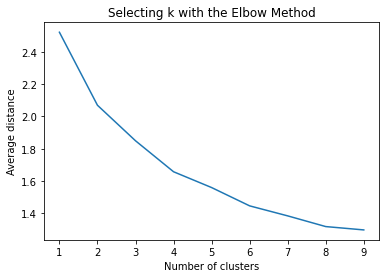

In [44]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [45]:
model3 = KMeans(n_clusters=4)
model3.fit(clus_train)
clusassign = model3.predict(clus_train)

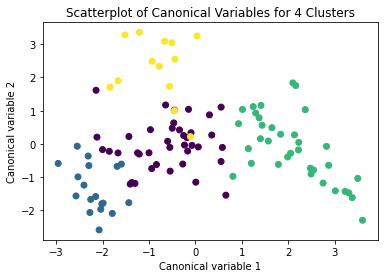

In [46]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plt.figure()
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 4 Clusters')
plt.show()

In [47]:
clus_train.reset_index(level=0, inplace=True)

In [48]:
cluslist = list(clus_train['index'])

In [49]:
labels = list(model3.labels_)

In [50]:
newlist = dict(zip(cluslist, labels))
print (newlist)

{159: 0, 196: 3, 70: 2, 29: 2, 53: 0, 153: 0, 35: 2, 14: 2, 116: 0, 126: 0, 123: 0, 106: 2, 142: 0, 89: 3, 160: 2, 56: 0, 180: 0, 133: 0, 31: 2, 17: 1, 145: 3, 100: 1, 178: 0, 173: 1, 59: 0, 68: 0, 108: 3, 212: 2, 19: 2, 188: 2, 78: 2, 67: 2, 37: 0, 186: 3, 208: 2, 58: 2, 2: 3, 95: 3, 72: 0, 141: 2, 22: 2, 10: 1, 107: 2, 38: 2, 94: 1, 200: 0, 42: 2, 151: 0, 24: 0, 28: 2, 104: 0, 32: 1, 16: 0, 80: 0, 150: 0, 102: 2, 88: 3, 93: 0, 6: 1, 55: 3, 103: 2, 194: 0, 47: 3, 39: 0, 131: 2, 115: 2, 136: 1, 144: 1, 69: 1, 128: 0, 140: 0, 148: 0, 11: 0, 64: 1, 84: 0, 175: 0, 197: 2, 183: 2, 210: 3, 54: 0, 114: 2, 4: 2, 91: 1, 77: 0, 66: 0, 92: 1, 201: 3, 105: 3, 205: 2, 154: 0, 45: 2, 97: 2, 63: 1, 211: 2, 158: 0, 135: 2, 79: 2, 179: 1, 149: 2, 113: 0, 27: 0, 139: 1, 90: 1, 184: 1, 152: 0}


In [51]:
newclus = pd.DataFrame.from_dict(newlist, orient='index')
newclus

,0
159,0
196,3
70,2
29,2
53,0
...,...
27,0
139,1
90,1
184,1


In [52]:
newclus.columns = ['cluster']

In [53]:
newclus.reset_index(level=0, inplace=True)

In [54]:
merged_train = pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)

,index,incomeperperson,employrate,femaleemployrate,polityscore,alcconsumption,lifeexpectancy,urbanrate,cluster
0,159,-0.393486,-0.044591,0.386877,0.017127,1.843020,-0.016099,0.790241,0
1,196,-0.146720,-1.591112,-1.778529,0.498818,-0.744736,0.505990,0.605211,3
2,70,-0.654365,0.564351,1.086052,0.659382,-0.727105,-0.481382,-0.224759,2
3,29,-0.679157,2.313852,2.389369,0.338255,0.554040,-1.880471,-1.986999,2
4,53,-0.278924,-0.634202,-0.515941,0.659382,-0.106122,0.446957,0.620333,0
...,...,...,...,...,...,...,...,...,...
95,135,-0.663595,0.245381,0.441182,0.338255,-0.862272,-0.018934,-1.682765,2
96,79,-0.674475,0.641677,0.122141,0.338255,-0.572349,-2.111239,-1.122336,2
97,179,0.882197,-0.653534,-0.434484,0.980510,0.981088,1.257835,0.980609,1
98,149,-0.615169,1.076636,1.411881,0.017127,-0.623282,-0.626890,-1.891814,2


In [55]:
merged_train.cluster.value_counts()

0    39
2    35
1    18
3    13
Name: cluster, dtype: int64

In [56]:
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
clustergrp

Clustering variable means by cluster


,index,incomeperperson,employrate,femaleemployrate,polityscore,alcconsumption,lifeexpectancy,urbanrate
cluster,,,,,,,,
0,107.512821,-0.284648,-0.424778,-0.200033,0.531755,0.614616,0.230201,0.164805
1,93.500000,1.846611,-0.196021,0.101022,0.811026,0.678541,1.195696,1.078462
2,100.657143,-0.628227,0.855152,0.873487,-0.583841,-0.506473,-1.034933,-0.896385
3,117.461538,-0.154556,-1.117490,-1.645378,-1.069767,-1.082728,0.439557,0.508658


In [59]:
internetuserate_train, internetuserate_test = train_test_split(internetuserate_data, test_size=.3, random_state=123)
internetuserate_train1=pd.DataFrame(internetuserate_train)
internetuserate_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(internetuserate_train1, merged_train, on='index')
sub5 = merged_train_all[['internetuserate', 'cluster']].dropna()

In [57]:
internetuserate_data = data_clean['internetuserate']

In [60]:

internetuserate_mod = smf.ols(formula='internetuserate ~ C(cluster)', data=sub5).fit()
internetuserate_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     71.17
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           8.18e-25
Time:                        14:23:44   Log-Likelihood:                -436.84
No. Observations:                 105   AIC:                             881.7
Df Residuals:                     101   BIC:                             892.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          35.7208      2.532     14.106      0.000      30.697      40.744
C(cluster)[T.1]    39.4860      4.506      8.763      0.000      30.547      48.425
C(cluster)[T.2]   -27.0808      3.682     -7.355      0.000     -34.385     -19.777
C(cluster)[T.3]    -7.4657      5.064     -1.474      0.144     -17.512       2.581
==============================================================================
Omnibus:                        5.290   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.908
Skew:                           0.387   Prob(JB):                       0.0859
Kurtosis:                       3.722   Cond. No.                         4.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""